In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pickle
# supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the csv file
df = pd.read_csv("iris.csv")
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#inspecting the file 

print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(150, 5)
Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000

In [4]:
#finding the percentage

print(round(100*(df.isnull().sum()/len(df.index)), 2))

Sepal_Length    0.0
Sepal_Width     0.0
Petal_Length    0.0
Petal_Width     0.0
Species         0.0
dtype: float64


### EDA

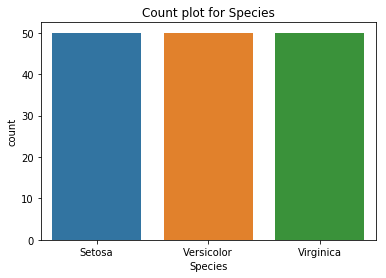

In [5]:
# plotting the count plot of "Species"
sns.countplot(x="Species", data=df)
plt.title("Count plot for Species")
plt.show()

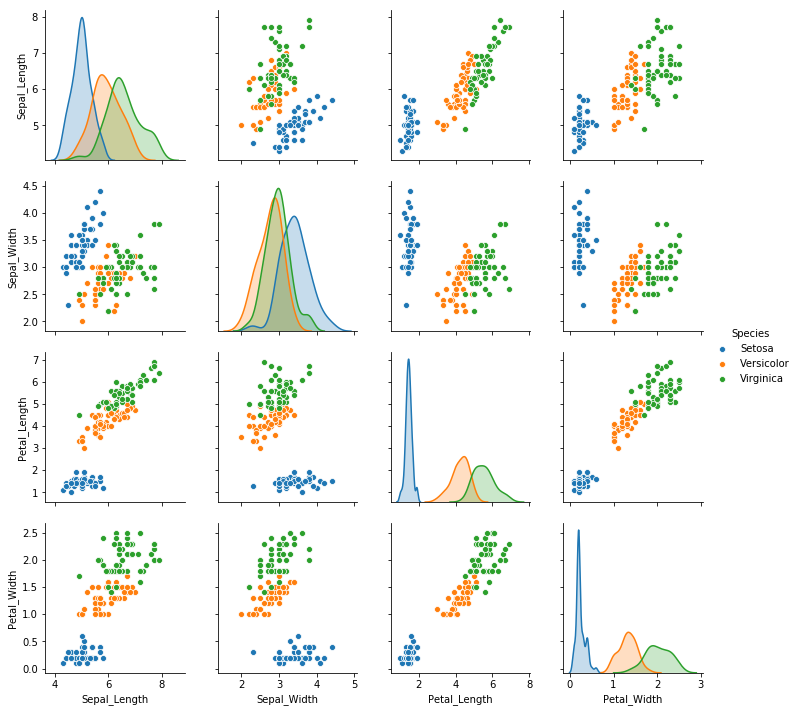

In [6]:
# Pair plot for pairwise relation
sns.pairplot(data=df, hue='Species')

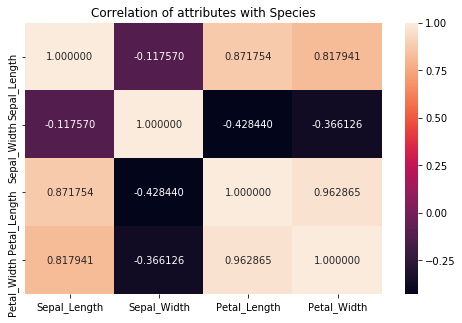

In [7]:
# Correlation among the attributes plotting using a HeatMap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Correlation of attributes with Species")
plt.show()

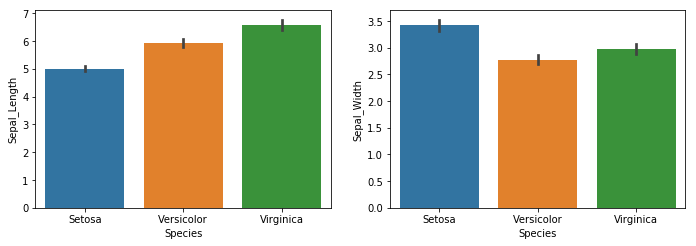

In [8]:
# Bar plot for Sepal Length and Sepal Width
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
sns.barplot(x="Species", y="Sepal_Length", data=df)
plt.subplot(2,3,2)
sns.barplot(x="Species", y="Sepal_Width", data=df)
plt.show()

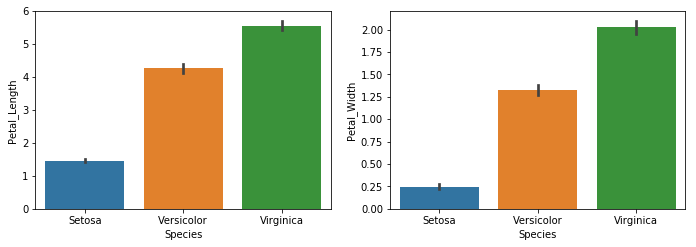

In [9]:
# Bar plot for Petal Length and Petal Width
plt.figure(figsize=(18, 8))
plt.subplot(2,3,1)
sns.barplot(x="Species", y="Petal_Length", data=df)
plt.subplot(2,3,2)
sns.barplot(x="Species", y="Petal_Width", data=df)

### Model Building

In [10]:
# Seperating the features into dependent and independent variables in x & y
X = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]]
y = df["Species"]

In [11]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [12]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [13]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [14]:
# confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9333333333333333 

[[14  0  0]
 [ 0 14  3]
 [ 0  0 14]]


In [15]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [16]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9555555555555556 

[[14  0  0]
 [ 0 16  1]
 [ 0  1 13]]


#### The model performs better when "rbf" kernel is used so we will go ahead with Non-Linear model.

In [17]:
# Make pickle file for our model
pickle.dump(non_linear_model, open("model.pkl", "wb"))